# Customer Segmentation: Clustering

* Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster.
* It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
* we will clean the data and form clusters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('marketing_campaign.csv',sep='\t')

### Data Cleaning and Adding features

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

there are null values in income

#### remove null values

In [5]:
data=data.dropna()

#### converting the type of Dt_Customer column

In [6]:
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'],format='mixed')

In [7]:
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

#### adding column - cutomer for
to show how many days a customer has been in the databes

need to calculate oldest and newest record

In [8]:
days = []
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

#### checking categories in the marriage and education section

In [9]:
data['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [10]:
data['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

### adding new features

#### getting age of cutomer from year_birth

we consider the last date of record entry as reference

In [11]:
max(data['Dt_Customer'])

Timestamp('2014-12-06 00:00:00')

In [12]:
data['Age']=2014-data['Year_Birth']

#### Total Spending

In [13]:
data['Spent']=data.iloc[:,9:15].sum(axis=1)

#### Deriving Living situation

In [14]:
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#### Total children in household

In [15]:
data["Children"]=data["Kidhome"]+data["Teenhome"]

#### total members in the household

In [16]:
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#### checking if parent

In [17]:
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#### defining education level

In [18]:
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#### removing columns we dont need

In [19]:
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID",'Response','Complain']
data = data.drop(to_drop, axis=1)

In [20]:
to_dropp=data.iloc[:,16:21]
data=data.drop(to_dropp,axis=1)

In [21]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,4.085289,2.671029,5.800993,5.319043,4.423735e+16,45.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,2.740951,2.926734,3.250785,2.425359,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,18.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,2.000000,0.000000,3.000000,3.000000,2.937600e+16,37.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,4.000000,2.000000,5.000000,6.000000,4.432320e+16,44.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,6.000000,4.000000,8.000000,7.000000,5.927040e+16,55.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,27.000000,28.000000,13.000000,20.000000,9.184320e+16,121.000000,2525.000000,3.000000,5.000000,1.000000


### Removing outliers

In [22]:
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]

#### plotting a pairplot to visulaise data

<Figure size 640x480 with 0 Axes>

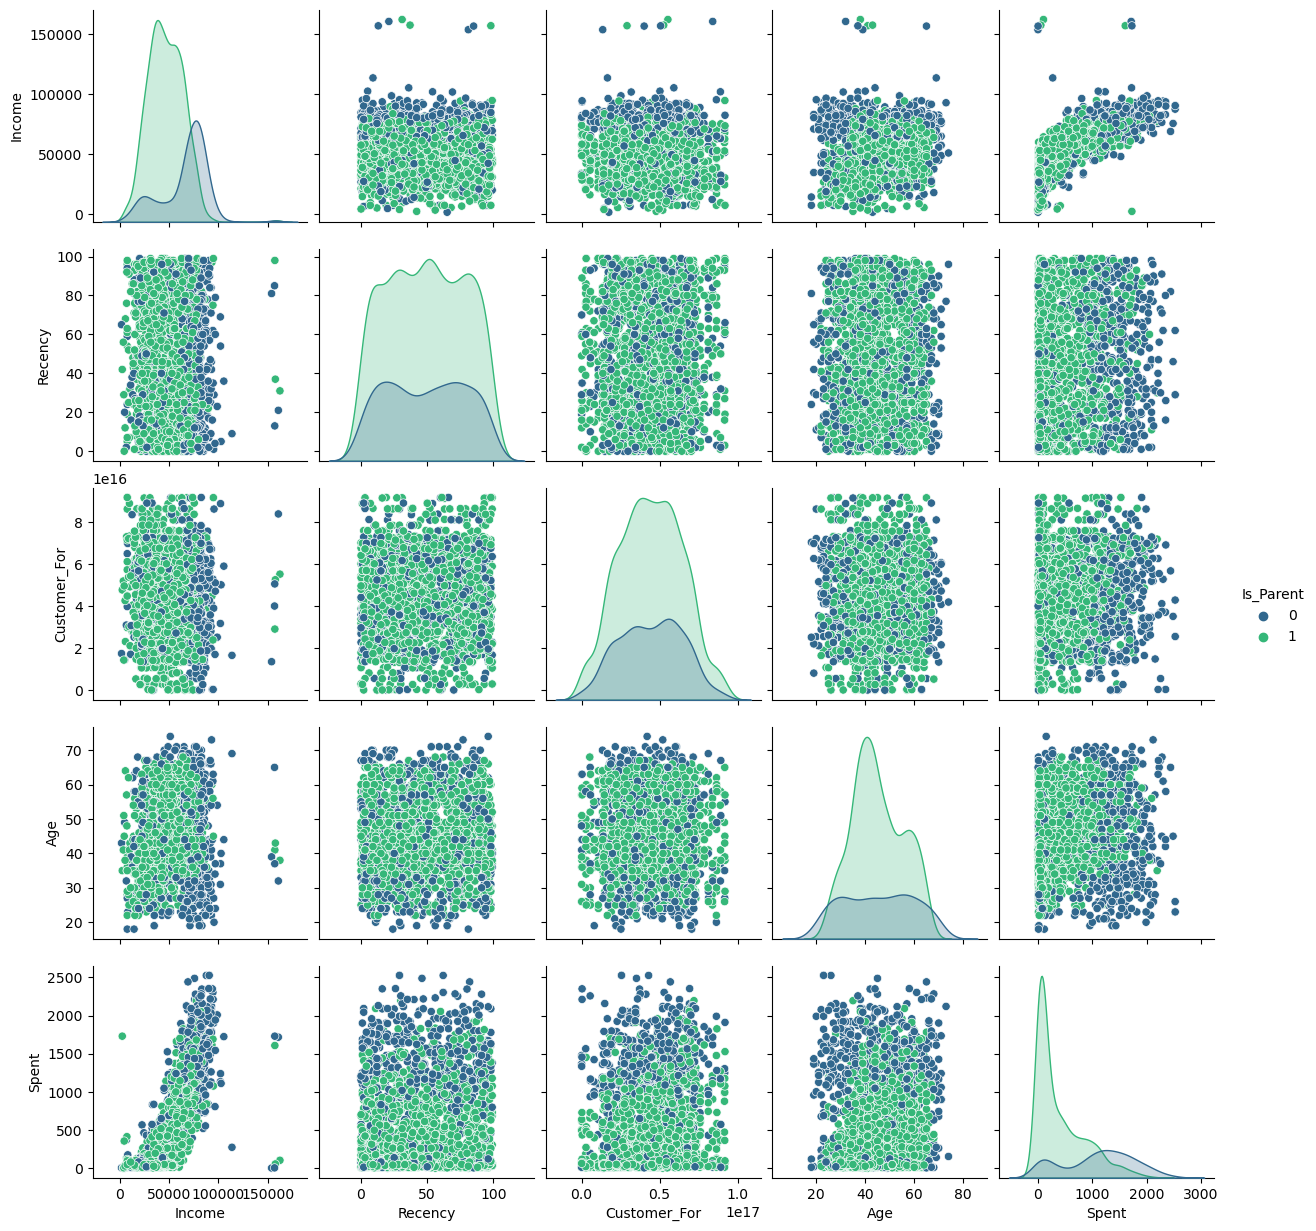

In [23]:
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette='viridis')
plt.show()

#### viewing correlation

<Axes: >

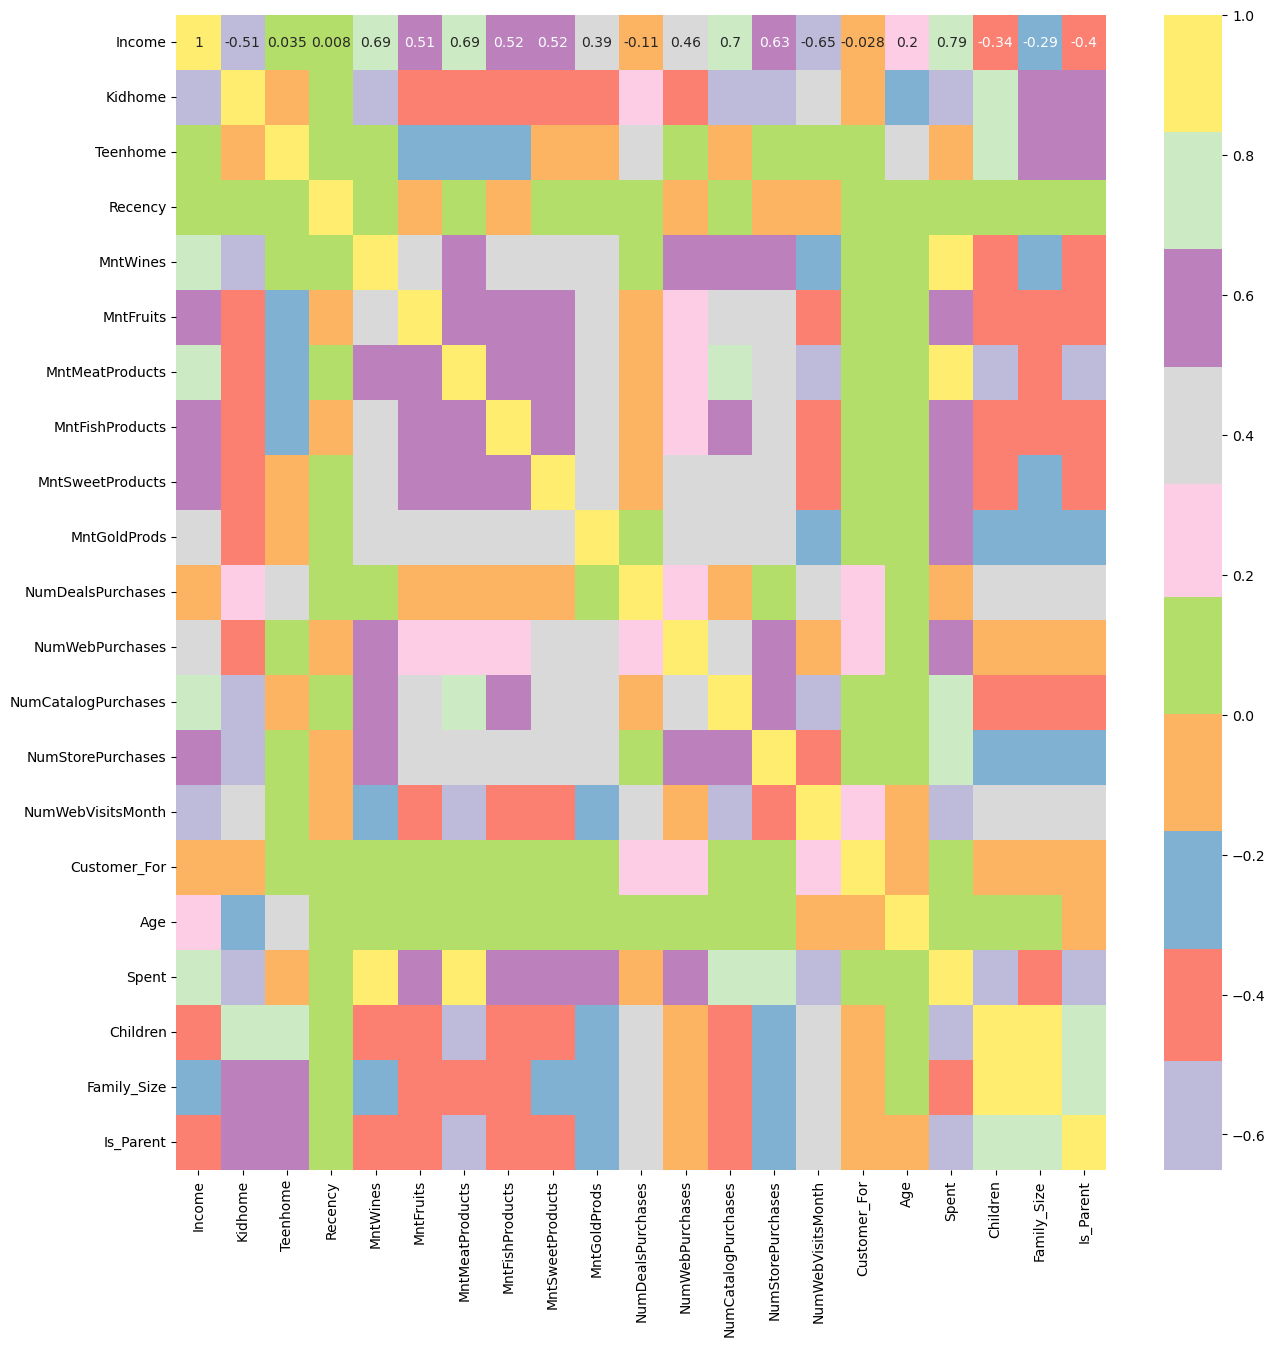

In [24]:
numeric_data = data.select_dtypes(include=[np.number])
corrmat =numeric_data.corr()
plt.figure(figsize=(15,15))  
sns.heatmap(corrmat,annot=True, cmap='Set3', center=0)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   MntWines             2212 non-null   int64  
 6   MntFruits            2212 non-null   int64  
 7   MntMeatProducts      2212 non-null   int64  
 8   MntFishProducts      2212 non-null   int64  
 9   MntSweetProducts     2212 non-null   int64  
 10  MntGoldProds         2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   int64 

### preprocessing data

#### coverting categorical variables to numeric form

In [26]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['Education', 'Living_With']

#### Label Encoding the object dtypes.

In [27]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

#### scaling 

Each feature in the scaled data has a mean of 0 and a standard deviation of 1. This makes further processing or modeling easier

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_data = pd.DataFrame(scaler.transform(data),columns= data.columns )

In [29]:
scaled_data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


### Dimensionality reduction 
* Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

**Principal component analysis (PCA)** is a dimensionality reduction and machine learning method used to simplify a large data set into a smaller set while still maintaining significant patterns and trends.

In [30]:
from sklearn.decomposition import PCA

In [31]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_data)
PCA_data = pd.DataFrame(pca.transform(scaled_data), columns=(["col1","col2", "col3"]))
PCA_data.describe().round()

,col1,col2,col3
count,2212.0,2212.0,2212.0
mean,0.0,0.0,0.0
std,3.0,2.0,1.0
min,-6.0,-4.0,-4.0
25%,-3.0,-1.0,-1.0
50%,-1.0,-0.0,-0.0
75%,2.0,1.0,1.0
max,7.0,6.0,7.0


#### 3d projection of data in reduced dimension

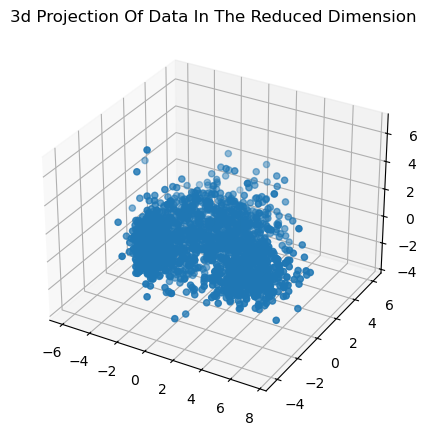

In [32]:
x =PCA_data["col1"]
y =PCA_data["col2"]
z =PCA_data["col3"]

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z )
ax.set_title("3d Projection Of Data In The Reduced Dimension")
plt.show()


### Clustering
**Agglomerative clustering**
* Hierarchial clustering method
* It starts with each data point as its own cluster and then repeatedly merges the closest pairs of clusters 

#### finding number of clusters
**elbow method**
* used to determine number of clusters to be formed
*  By plotting the inertia (spread of data) against the number of clusters and looking for the point where the inertia reduction slows down significantly(elbow shape), you can identify the most appropriate number of clusters for your dataset.

In [33]:
!pip install yellowbrick -q
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

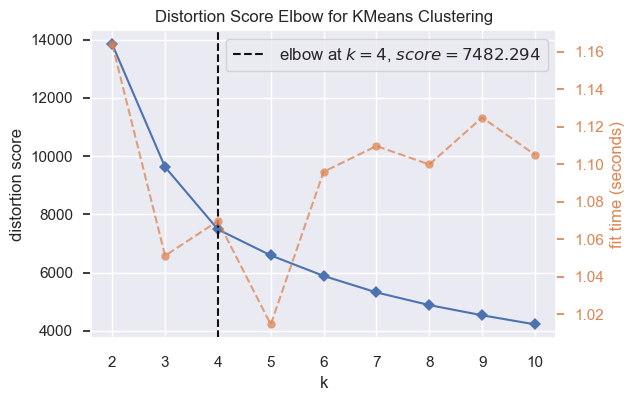

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
sns.set(palette='deep',rc={"figure.figsize": (6, 4)})
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_data)
Elbow_M.show()

4 is the optimal number of clusters

#### agglomerative clustering model

In [35]:
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(PCA_data)
PCA_data["Clusters"] = yhat_AC
data["Clusters"]= yhat_AC

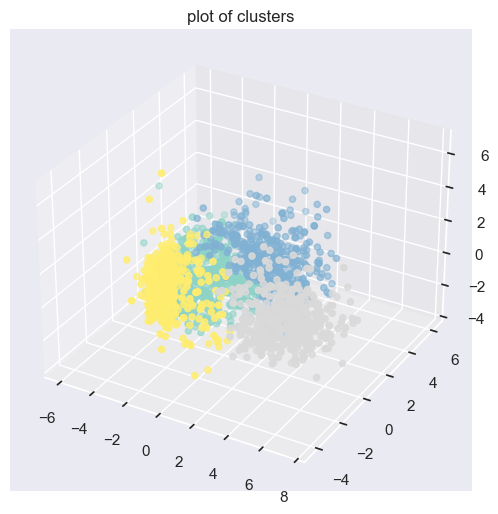

In [36]:
x =PCA_data["col1"]
y =PCA_data["col2"]
z =PCA_data["col3"]

fig=plt.figure(figsize=(8,6))
ax=plt.subplot(111,projection='3d')
ax.scatter(x,y,z,s=20,c=PCA_data['Clusters'],cmap='Set3')
ax.set_title('plot of clusters')
plt.show()

#### distribution of clusters 

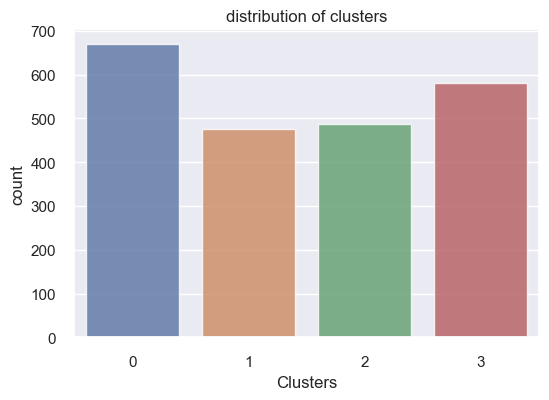

In [37]:
pl=sns.countplot(x=data['Clusters'],palette='deep',alpha=0.8)
pl.set_title('distribution of clusters')
plt.show()

#### clusters income and spending

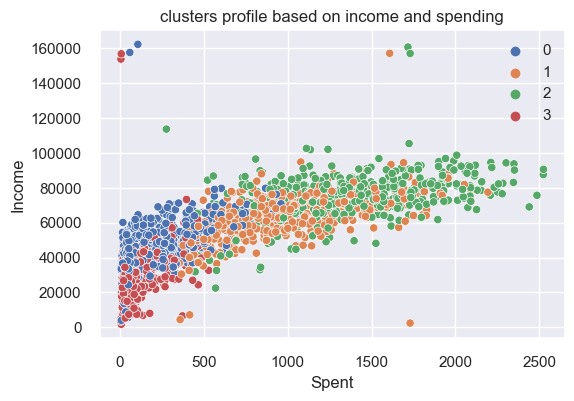

In [38]:
pl=sns.scatterplot(x=data['Spent'],y=data['Income'],hue=data['Clusters'],palette='deep')
pl.set_title('clusters profile based on income and spending')
plt.legend()
plt.show()

* group 0: high spending average income
* group 1: low spending low income
* group 2: high spending high income
* group 3: high spending average income

#### amount spent by clusters

Text(0.5, 1.0, 'amount spent by clusters')

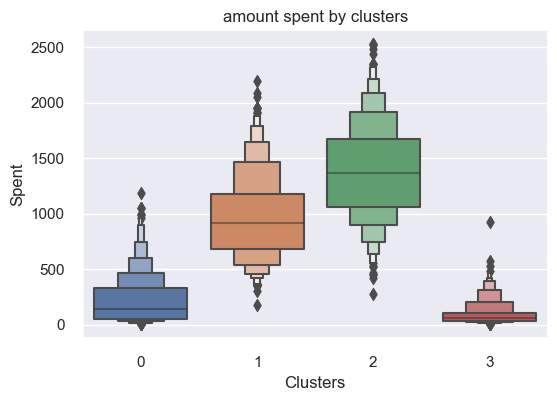

In [39]:
sns.boxenplot(x=data['Clusters'],y=data['Spent'])
plt.title('amount spent by clusters')

cluster 2 is the biggest spender 

#### Number of deals Purchased

Text(0.5, 1.0, 'Number of deals purchased')

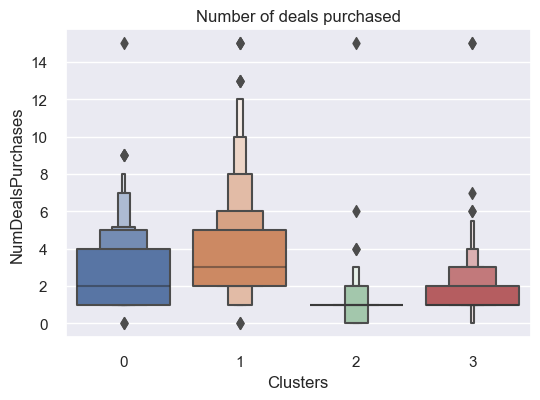

In [40]:
sns.boxenplot(x=data['Clusters'],y=data['NumDealsPurchases'])
plt.title('Number of deals purchased')

the average/low income groups (0,3) took the most amount of deals offered 

#### spending on products by clusters

In [41]:
data2=data.iloc[:,5:11]
data2['Clusters']=data['Clusters']

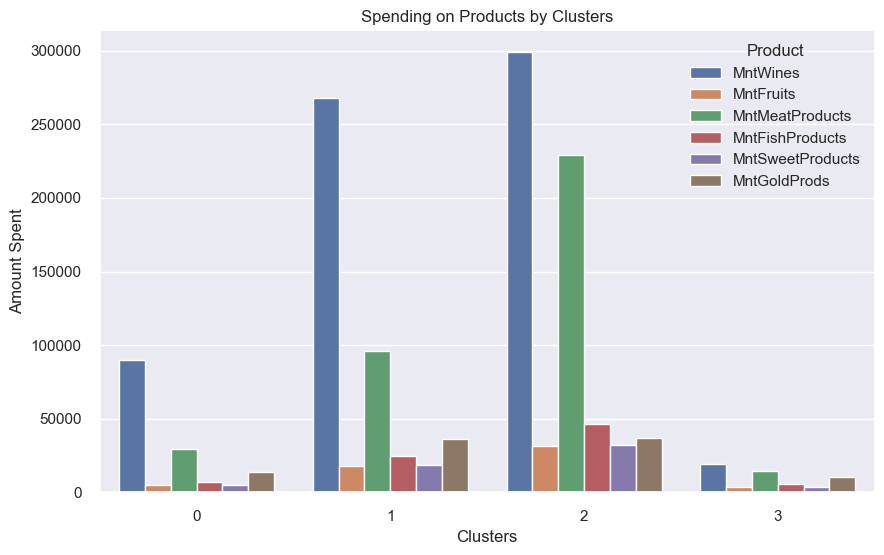

In [42]:
# creating clustered bar chart
grouped = data2.groupby('Clusters').sum().reset_index()
melted = pd.melt(grouped, id_vars='Clusters', var_name='product', value_name='spending')
plt.figure(figsize=(10, 6))
sns.barplot(x='Clusters', y='spending', hue='product', data=melted, palette='deep')
plt.title('Spending on Products by Clusters')
plt.xlabel('Clusters')
plt.ylabel('Amount Spent')
plt.legend(title='Product')
plt.show()

### Profiling
* we have formed clustered and looked at spending habits.
* we need to identify who is in the clusters and identify target customer

#### plotting clusters on basis of personalfeatures

##### kids (age less than 13) at home

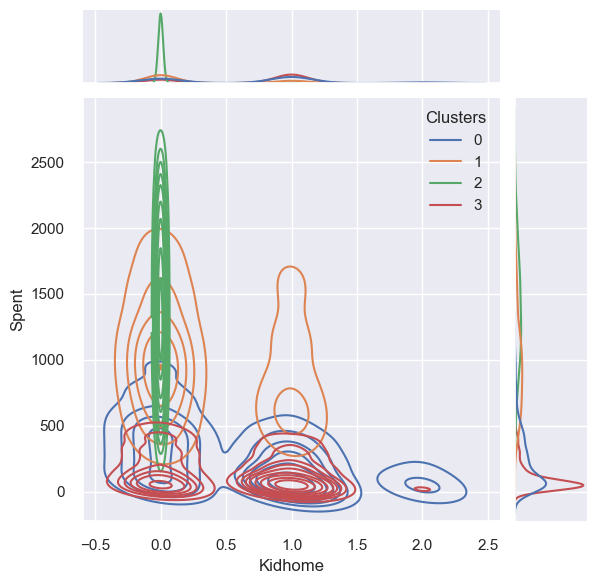

In [43]:
sns.jointplot(x=data['Kidhome'],y=data['Spent'],hue=data['Clusters'],palette='deep',kind='kde')

##### teenagers at home

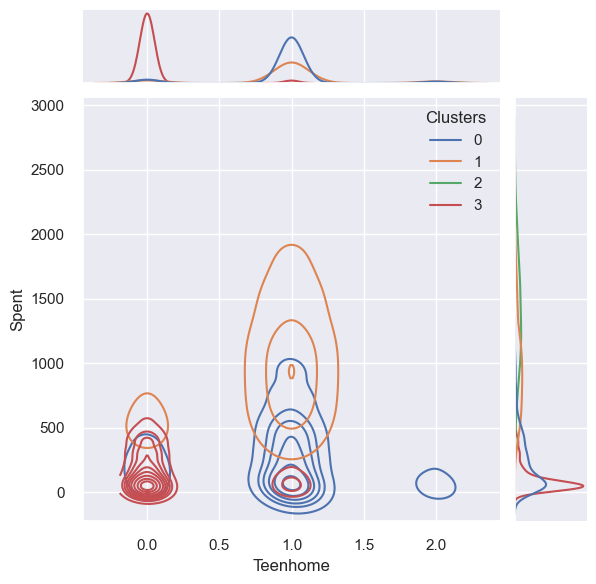

In [44]:
sns.jointplot(x=data['Teenhome'],y=data['Spent'],hue=data['Clusters'],palette='deep',kind='kde')

##### age

<Axes: xlabel='Clusters', ylabel='Age'>

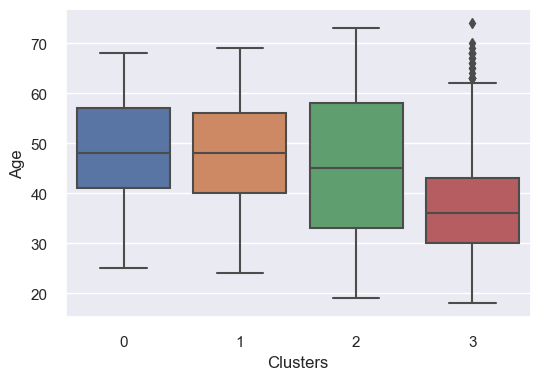

In [45]:
sns.boxplot(x=data['Clusters'],y=data['Age'],palette='deep')

##### total children

<Axes: xlabel='Children', ylabel='Spent'>

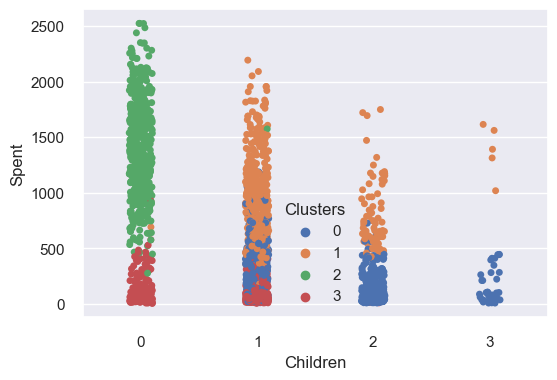

In [46]:
sns.stripplot(x=data['Children'], y=data["Spent"], hue =data["Clusters"],palette='deep')

##### family size

<Axes: xlabel='Family_Size', ylabel='Spent'>

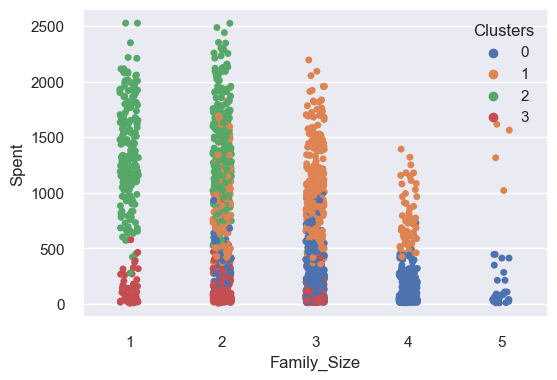

In [47]:
sns.stripplot(x=data['Family_Size'], y=data["Spent"], hue =data["Clusters"],palette='deep')

##### parent

<Axes: xlabel='Is_Parent', ylabel='Spent'>

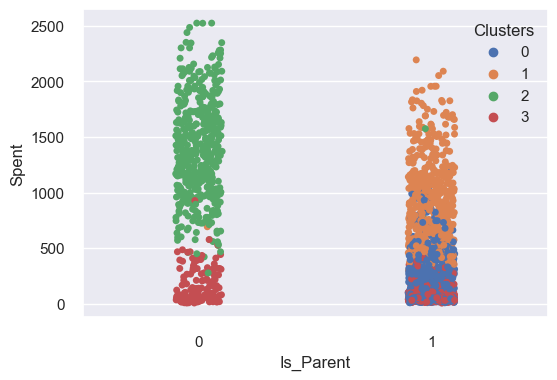

In [48]:
sns.stripplot(x=data['Is_Parent'], y=data["Spent"], hue =data["Clusters"],palette='deep')

##### education

<Axes: xlabel='Clusters', ylabel='count'>

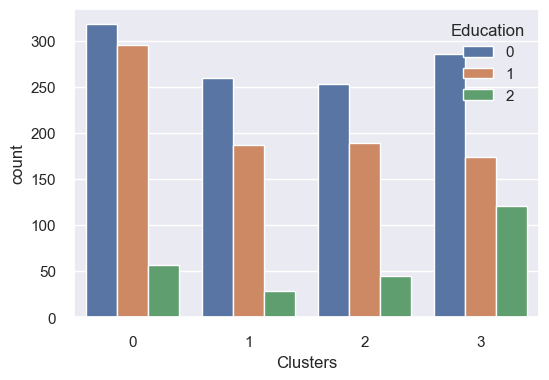

In [49]:
sns.countplot(x=data['Clusters'], hue =data["Education"].astype(str),palette='deep')

### cluster information

#### cluster 0:
* definitely a parent
* have 1 or 2 kids
* mostly have a teenager
* maximum 4 members and atleast 2
* average age between 40 to 60
* high spending and average income


#### cluster 1:
* majority of them are parents
* have mostly one kid
* no teenagers
* maximum 3 people in the family
* average age between 30 to 40
* low spending low income


#### cluster 2:
* definitely not a parent
* no kids
* no teenagers
* maximum 2 people in the family
* average age between 35 to 60 (spans all ages)
* high spending high income

#### cluster 3:
* definitely a parent
* have 1 to 3 kids
* majority have 1 teenager
* family is between 2 to 5 people
* average age is between 42 to 55
* high spending average income

### Conclusion

* group 0 and 2 are the people with maximum spending
* cluster 2 is a high income no kids group which can be an ideal target group for increased quality products
* cluster 3 and 0 are families who will respond to discounts,deals and bulk sales
* cluster 1 is mostly a couple and one kid 
